In [1]:
import sys
sys.path.insert(0, '$ATHENA_DIR/vis/python')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import struct
import array
import os
from scipy.interpolate import griddata

# Athena++ modules
# import athena_read
import h5py

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
fname='disk.hst'

In [3]:
mass_sink = np.genfromtxt(fname,usecols=(43))

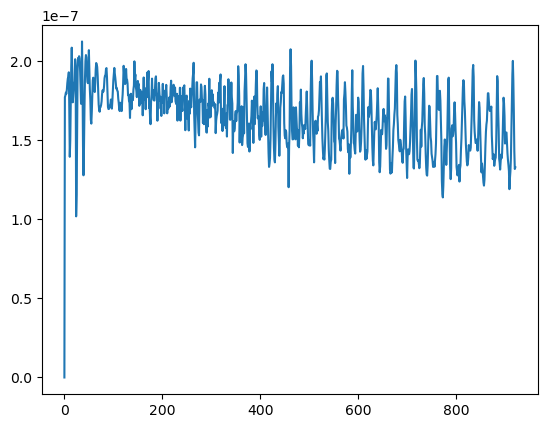

In [4]:
plt.plot(mass_sink)

In [5]:
fr1 = np.genfromtxt(fname,usecols=(10))
ft1 = np.genfromtxt(fname,usecols=(11))
fp1 = np.genfromtxt(fname,usecols=(12))

fr2 = np.genfromtxt(fname,usecols=(13))
ft2 = np.genfromtxt(fname,usecols=(14))
fp2 = np.genfromtxt(fname,usecols=(15))

In [6]:
fx1 = np.genfromtxt(fname,usecols=(16))
fy1 = np.genfromtxt(fname,usecols=(17))
fz1 = np.genfromtxt(fname,usecols=(18))

fx2 = np.genfromtxt(fname,usecols=(19))
fy2 = np.genfromtxt(fname,usecols=(20))
fz2 = np.genfromtxt(fname,usecols=(21))

In [7]:
ftot1 = np.sqrt(fx1 ** 2 + fy1 ** 2 + fz1 ** 2)
ftot2 = np.sqrt(fx2 ** 2 + fy2 ** 2 + fz2 ** 2)

In [8]:
torque1 = np.genfromtxt(fname,usecols=(22))
torque2 = np.genfromtxt(fname,usecols=(23))

Text(0, 0.5, 'fr')

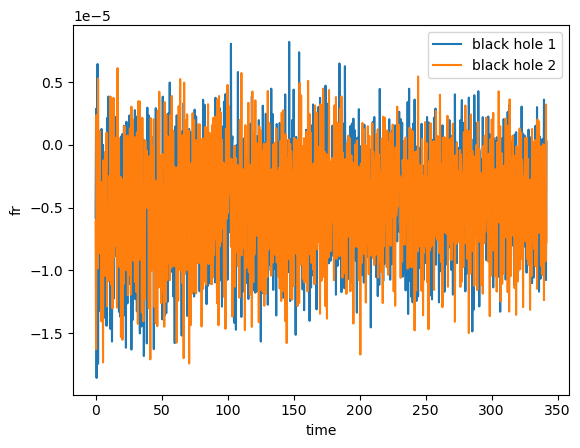

In [9]:
plt.plot(np.genfromtxt(fname,usecols=(0)),fr1, '-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),fr2, '-', label='black hole 2')
plt.legend()
plt.xlabel('time')
plt.ylabel('fr')
# plt.xlim(0,20)

Text(0, 0.5, 'ftot')

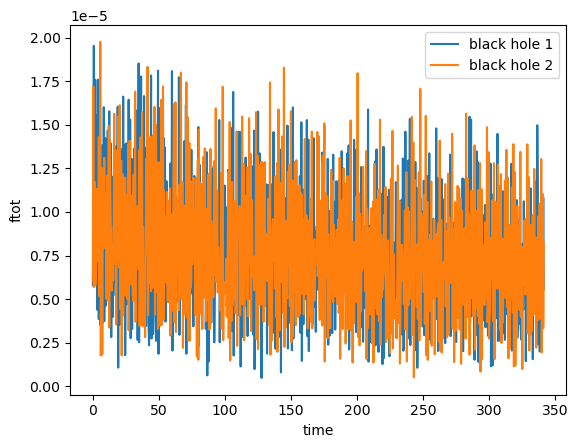

In [10]:
plt.plot(np.genfromtxt(fname,usecols=(0)),ftot1, '-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),ftot2, '-', label='black hole 2')
plt.legend()
plt.xlabel('time')
plt.ylabel('ftot')

Text(0, 0.5, 'torque')

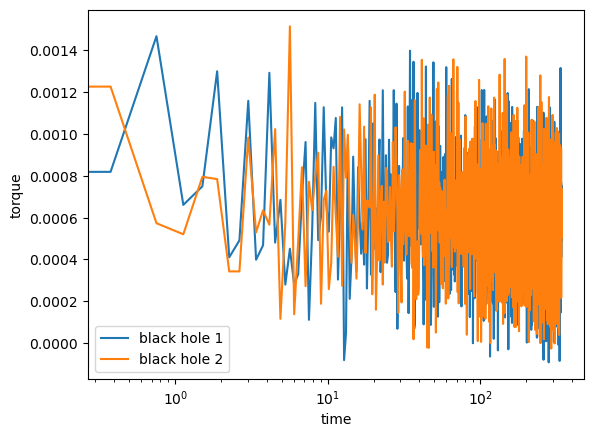

In [11]:
plt.plot(np.genfromtxt(fname,usecols=(0)),torque1,'-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),torque2,'-', label='black hole 2')
plt.legend()
plt.xscale('log')
plt.xlabel('time')
plt.ylabel('torque')

In [12]:
time = np.genfromtxt(fname,usecols=(0))

mp1 = np.genfromtxt(fname,usecols=(36)) / 11.
mp2 = np.genfromtxt(fname,usecols=(37)) / 11.

xpp1 = np.genfromtxt(fname,usecols=(24)) / 11.
ypp1 = np.genfromtxt(fname,usecols=(25)) / 11.
zpp1 = np.genfromtxt(fname,usecols=(26)) / 11.

xpp2 = np.genfromtxt(fname,usecols=(27)) / 11.
ypp2 = np.genfromtxt(fname,usecols=(28)) / 11.
zpp2 = np.genfromtxt(fname,usecols=(29)) / 11.

In [13]:
rb = np.sqrt((xpp1-xpp2)**2+(ypp1-ypp2)**2+(zpp1-zpp2)**2)
r_sep = rb[0]

In [14]:
f_acc_x1 = np.genfromtxt(fname,usecols=(44)) 
f_acc_x2 = np.genfromtxt(fname,usecols=(45)) 
f_acc_y1 = np.genfromtxt(fname,usecols=(46)) 
f_acc_y2 = np.genfromtxt(fname,usecols=(47)) 
f_acc_z1 = np.genfromtxt(fname,usecols=(48)) 
f_acc_z2 = np.genfromtxt(fname,usecols=(49)) 

f_grav_x1 = np.genfromtxt(fname,usecols=(50)) 
f_grav_x2 = np.genfromtxt(fname,usecols=(51))
f_grav_y1 = np.genfromtxt(fname,usecols=(52))
f_grav_y2 = np.genfromtxt(fname,usecols=(53))
f_grav_z1 = np.genfromtxt(fname,usecols=(54))
f_grav_z2 = np.genfromtxt(fname,usecols=(55))

Text(0.5, 0, 'time')

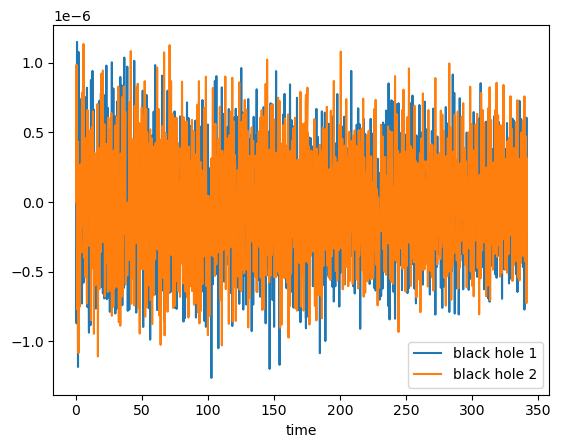

In [15]:
plt.plot(np.genfromtxt(fname,usecols=(0)),f_acc_x1, '-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),f_acc_x2, '-', label='black hole 2')
plt.legend()
plt.xlabel('time')

Text(0, 0.5, 'fr')

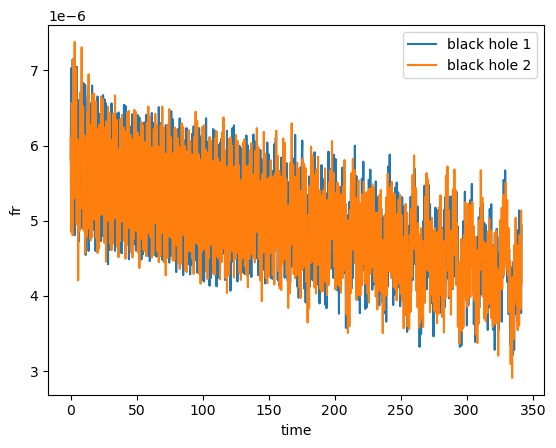

In [16]:
plt.plot(np.genfromtxt(fname,usecols=(0)),f_grav_x1, '-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),f_grav_x2, '-', label='black hole 2')
plt.legend()
plt.xlabel('time')
plt.ylabel('fr')

In [17]:
f_tot_x1 = f_acc_x1 + f_grav_x1
f_tot_x2 = f_acc_x2 + f_grav_x2

f_tot_y1 = f_acc_y1 + f_grav_y1
f_tot_y2 = f_acc_y2 + f_grav_y2

f_tot_z1 = f_acc_z1 + f_grav_z1
f_tot_z2 = f_acc_z2 + f_grav_z2

Text(0.5, 0, 'time')

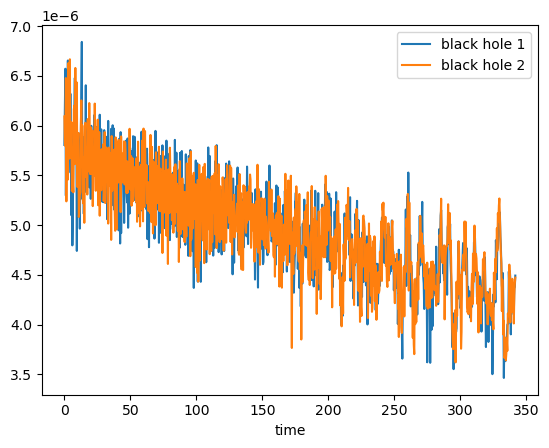

In [18]:
plt.plot(np.genfromtxt(fname,usecols=(0)),f_tot_x1, '-', label='black hole 1')
plt.plot(np.genfromtxt(fname,usecols=(0)),f_tot_x2, '-', label='black hole 2')
plt.legend()
plt.xlabel('time')

In [19]:
ldot_x = (zpp1 - zpp2) * (f_tot_y1 - f_acc_y2) - (f_tot_z1 - f_acc_z2) * (ypp1 - ypp2)
ldot_y = (xpp1 - xpp2) * (f_tot_z1 - f_acc_z2) - (f_tot_x1 - f_acc_x2) * (zpp1 - zpp2)
ldot_z = (xpp1 - xpp2) * (f_tot_y1 - f_acc_y2) - (f_tot_x1 - f_acc_x2) * (ypp1 - ypp2)